In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
from sklearn import preprocessing
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm_notebook as tqdm

%matplotlib inline

In [1]:
# Отключение предупреждений в ноутбуке 

# import warnings
# warnings.filterwarnings("ignore")
# warnings.filterwarnings("ignore", category=DeprecationWarning)

(1797, 64) (1797,)


<Figure size 432x288 with 0 Axes>

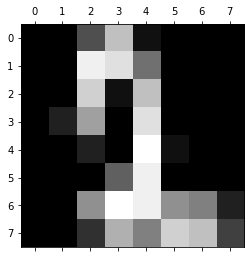

In [7]:
X, y = load_digits(return_X_y=True)
digit = X[12].reshape((8, 8))
print(X.shape, y.shape)
plt.gray()
plt.matshow(digit)
plt.show()

In [18]:
metrics = []
for n_comp in tqdm(range(1, 9)):
    pca = PCA(n_components=n_comp)
    digit_mse = []
    for digit in X:
        digit = np.reshape(digit, (8, 8))
        zipped_digit = pca.fit_transform(digit)
        reconstr_digit = pca.inverse_transform(zipped_digit)
        digit_mse.append(mean_squared_error(digit, reconstr_digit))
    metrics.append(np.mean(digit_mse))

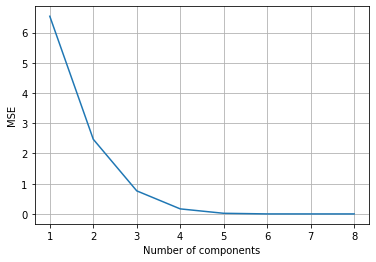

In [19]:
plt.plot(range(1, 9), metrics)
plt.xlabel('Number of components')
plt.ylabel('MSE')
plt.grid()

Загрузим датасет 'Faulty-steel-plates' с kaggle: (ссылка - https://www.kaggle.com/uciml/faulty-steel-plates)

В датасете имеется 7 неиправностей стальной платы и некие параметры данных плат (27 атрибутов)

In [8]:
dataset_temp=pd.read_csv('data/faults.csv') 
dataset_temp.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [11]:
data = dataset_temp.iloc[:,:27]
data[:4]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212


In [32]:
output_y = dataset_temp.iloc[:,27:]
input_x = dataset_temp.iloc[:,:27]

le = LabelEncoder()
targets = (output_y.iloc[:,:] == 1).idxmax(1)

print(targets.value_counts())
Y = le.fit_transform(targets)
Y

Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
dtype: int64


array([4, 4, 4, ..., 3, 3, 3])

В данном датасете 34 атрибута. Первые 27 атрибутов описывают некоторые неиправности стальной платы, которые были замечены в изображениях.

*    X_Minimum
*   X_Maximum
*    Y_Minimum
*    Y_Maximum
*    Pixels_Areas
*    X_Perimeter
*    Y_Perimeter
*    Sum_of_Luminosity
*    Minimum_of_Luminosity
*    Maximum_of_Luminosity
*    Length_of_Conveyer
*    TypeOfSteel_A300
*    TypeOfSteel_A400
*    Steel_Plate_Thickness
*    Edges_Index
*    Empty_Index
*    Square_Index
*    Outside_X_Index
*    Edges_X_Index
*    Edges_Y_Index
*    Outside_Global_Index
*    LogOfAreas
*    Log_X_Index
*    Log_Y_Index
*    Orientation_Index
*    Luminosity_Index
*    SigmoidOfAreas

Последние 7 колонок - это класс, к которому относится то или иное повреждение (one-hot-encoding). Например, если какой-либо элемент классифицируется как "Stains" (пятна), то в колонке 'Stains' 
будет стоять единица. Последние 7 атрибутов представляют собой класс для каждого элемента.

*    Pastry
*    Z_Scratch
*    K_Scatch
*    Stains
*    Dirtiness
*    Bumps
*    Other_Faults


**Нормализуем** параметры

In [14]:
headers = list(data.columns.values)

In [15]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.950733,-0.946167,-0.959296,-0.959291,-0.996528,-0.997128,-0.995262,-0.995864,-0.251232,-0.342593,...,-0.992681,-0.074269,1.000000,1.0,-0.129375,-0.565757,-0.228168,0.824986,-0.137599,0.051532
1,-0.243402,-0.242832,-0.609987,-0.609985,-0.998611,-0.998468,-0.996805,-0.998077,-0.172414,-0.203704,...,-0.995197,0.188312,0.930013,1.0,-0.290393,-0.655836,-0.313218,0.799667,0.003413,-0.592736
2,-0.027566,-0.027501,-0.761620,-0.761619,-0.999096,-0.998851,-0.998017,-0.998668,-0.024631,-0.185185,...,-0.994968,0.492695,0.889449,1.0,-0.364982,-0.655836,-0.410477,0.672164,0.067764,-0.782066
3,0.000587,0.001755,-0.944125,-0.944120,-0.997720,-0.997894,-0.995152,-0.996765,-0.024631,-0.175926,...,-0.991537,0.063515,1.000000,1.0,-0.203514,-0.607587,-0.223613,0.851415,0.026325,-0.086947
4,0.512023,0.523698,-0.924294,-0.924257,-0.968464,-0.988896,-0.971462,-0.957437,-0.635468,-0.175926,...,-0.974611,-0.454343,0.975830,1.0,0.261925,-0.329631,0.131754,0.941595,-0.025350,1.000000


При нормализации стираются названия колонок, поэтому необходимо **восстановить** их:

In [16]:
df_norm.columns = headers
df_norm.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-0.950733,-0.946167,-0.959296,-0.959291,-0.996528,-0.997128,-0.995262,-0.995864,-0.251232,-0.342593,...,-0.992681,-0.074269,1.000000,1.0,-0.129375,-0.565757,-0.228168,0.824986,-0.137599,0.051532
1,-0.243402,-0.242832,-0.609987,-0.609985,-0.998611,-0.998468,-0.996805,-0.998077,-0.172414,-0.203704,...,-0.995197,0.188312,0.930013,1.0,-0.290393,-0.655836,-0.313218,0.799667,0.003413,-0.592736
2,-0.027566,-0.027501,-0.761620,-0.761619,-0.999096,-0.998851,-0.998017,-0.998668,-0.024631,-0.185185,...,-0.994968,0.492695,0.889449,1.0,-0.364982,-0.655836,-0.410477,0.672164,0.067764,-0.782066
3,0.000587,0.001755,-0.944125,-0.944120,-0.997720,-0.997894,-0.995152,-0.996765,-0.024631,-0.175926,...,-0.991537,0.063515,1.000000,1.0,-0.203514,-0.607587,-0.223613,0.851415,0.026325,-0.086947
4,0.512023,0.523698,-0.924294,-0.924257,-0.968464,-0.988896,-0.971462,-0.957437,-0.635468,-0.175926,...,-0.974611,-0.454343,0.975830,1.0,0.261925,-0.329631,0.131754,0.941595,-0.025350,1.000000


In [17]:
len(df_norm)

1941

Построим матрицу корреляций:

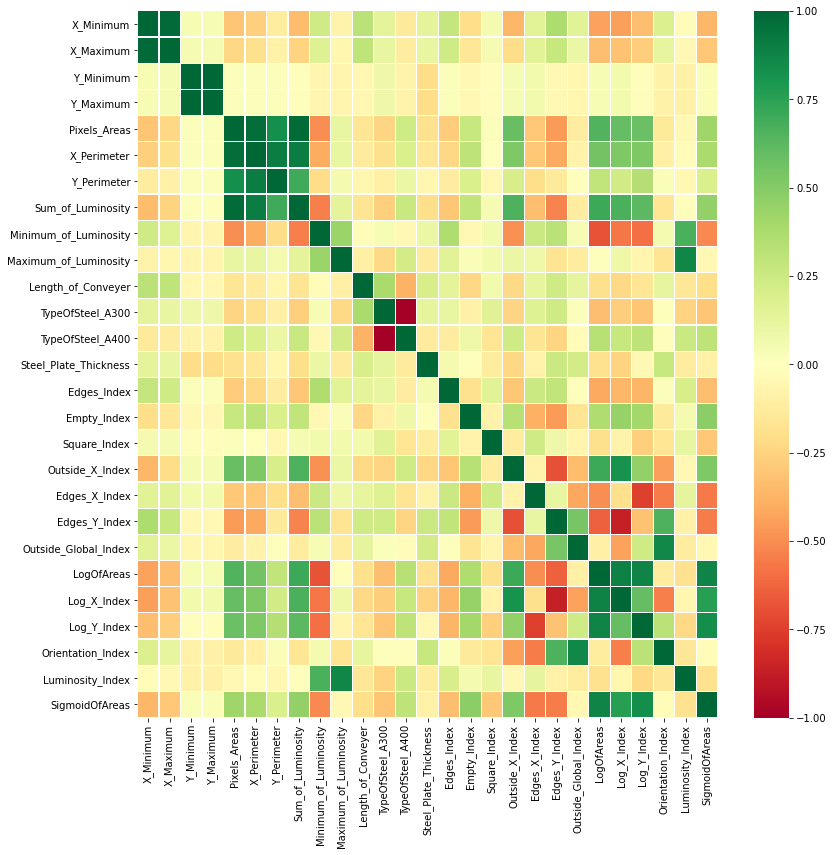

In [19]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(df_norm.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)
plt.show()

In [28]:
df = df_norm
df['target'] = Y

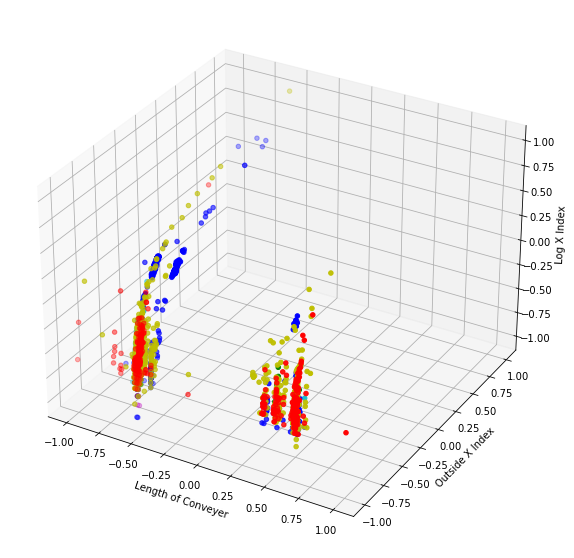

In [29]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

colors = ['r', 'g', 'b', 'y', 'b', 'm', '#17becf']

for i in range(7):
  
  a = df.loc[df['target'] == i, 'Length_of_Conveyer']
  b = df.loc[df['target'] == i, 'Outside_X_Index']
  c = df.loc[df['target'] == i, 'Log_X_Index']

  ax.scatter(a, b, c, c=colors[i])

ax.set_xlabel('Length of Conveyer')
ax.set_ylabel('Outside X Index')
ax.set_zlabel('Log X Index')
plt.show()

По графику классы не особо различимы. В пространстве классы находятся близко друг к другу.

Можно также посмотреть распределение классов в 3D пространстве по другим атрибутам, например: **{'Steel_Plate_Thickness', 'Edges_Index', 'Outside_Global_Index'}**

In [33]:
df = pd.DataFrame(input_x, columns = ['Steel_Plate_Thickness', 'Edges_Index', 'Outside_Global_Index'])
df['target'] = Y

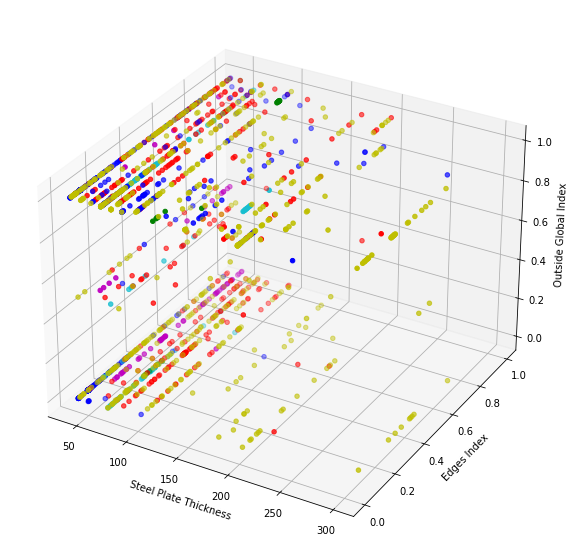

In [34]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

colors = ['r', 'g', 'b', 'y', 'b', 'm', '#17becf']

for i in range(7):
  
  a = df.loc[df['target'] == i, 'Steel_Plate_Thickness']
  b = df.loc[df['target'] == i, 'Edges_Index']
  c = df.loc[df['target'] == i, 'Outside_Global_Index']

  ax.scatter(a, b, c, c=colors[i])

ax.set_xlabel('Steel Plate Thickness')
ax.set_ylabel('Edges Index')
ax.set_zlabel('Outside Global Index')
plt.show()

Как же уменьшить количество атрибутов, при этом оставив данные в пространстве таким образом, чтобы легко можно было классифицировать?

## Принцип минимальных компонент

Почитать про метод - https://ru.wikipedia.org/wiki/Метод_главных_компонент

Соответственно, было 23 атрибута

In [36]:
print(df_norm.shape)

(1941, 28)


Создаем модель PCA

In [37]:
pca = PCA(n_components=3)

Уменьшаем количество атрибутов таблицы, **проецируя все атрибуты в новое пространство**, составленное методом минимальных компонент (всего выбрано **3 самых важных вектора для пространства**)

In [38]:
principalComponents = pca.fit_transform(df_norm)
projected_x = pd.DataFrame(data = principalComponents,
                           columns = ['atribute_1', 'atribute_2', 'atribute_3'])


После применения PCA осталось только 3 атрибута

Таргет значения (**класс дефекта**) не изменился для векторов, **спроецированных в данное пространство**

In [39]:
projected_x['target'] = Y

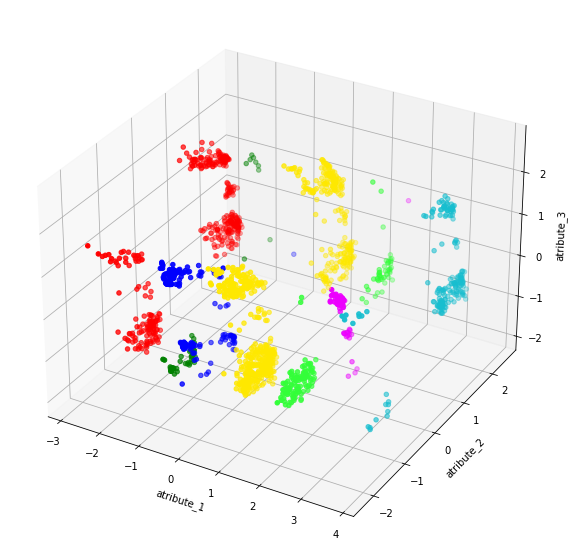

In [40]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

colors = ['r', 'g', 'b', '#FFE800', '#33FF39', '#EC00FF', '#17becf']

for i in range(7):
    a = projected_x.loc[projected_x['target'] == i, 'atribute_1']
    b = projected_x.loc[projected_x['target'] == i, 'atribute_2']
    c = projected_x.loc[df['target'] == i, 'atribute_3']
    ax.scatter(a, b, c, c=colors[i])

ax.set_xlabel('atribute_1')
ax.set_ylabel('atribute_2')
ax.set_zlabel('atribute_3')
plt.show()

Классы расположены в пространстве так, что их можно идеально отличить друг от друга!

**Если бы данные не были нормированы, то мы получили бы совершенно другой результат!**

In [41]:
principalComponents = pca.fit_transform(dataset_temp.iloc[:,:27])
projected_x = pd.DataFrame(data = principalComponents,
                           columns = ['atribute_1', 'atribute_2', 'atribute_3'])
projected_x['target'] = Y

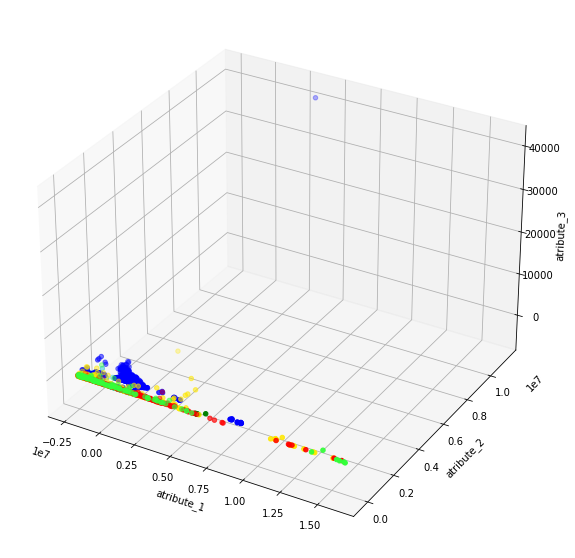

In [42]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

colors = ['r', 'g', 'b', '#FFE800', '#33FF39', '#EC00FF', '#17becf']

for i in range(7):
    a = projected_x.loc[projected_x['target'] == i, 'atribute_1']
    b = projected_x.loc[projected_x['target'] == i, 'atribute_2']
    c = projected_x.loc[df['target'] == i, 'atribute_3']
    ax.scatter(a, b, c, c=colors[i])

ax.set_xlabel('atribute_1')
ax.set_ylabel('atribute_2')
ax.set_zlabel('atribute_3')
plt.show()

**Вывод:** при работе с методом минимальных компонент данные необходимо **нормировать**. То же самое касается некоторых других моделей.

## Методы оптимизации

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [49]:
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [50]:
x0 = np.array([1.3, 5])

In [51]:
res = minimize(rosen, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 106
         Function evaluations: 199


In [52]:
def f1(x):
    return (x[0]**2) + (x[1]**2) 

In [53]:
res = minimize(f1, [2,5], method='nelder-mead', options={'xtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 64
         Function evaluations: 121


In [54]:
def f2(x):
    return 2**(x[0]**2) + (x[1]**2) - 5

In [61]:
res = minimize(f2, [2,5], method='nelder-mead', options={'xtol': 1e-6, 'disp': True})
res

Optimization terminated successfully.
         Current function value: -4.000000
         Iterations: 59
         Function evaluations: 115


 final_simplex: (array([[ 3.70640290e-07,  1.01459929e-07],
       [-1.82667519e-07, -2.94671468e-07],
       [-3.22143950e-07,  2.62969111e-07]]), array([-4., -4., -4.]))
           fun: -3.9999999999998943
       message: 'Optimization terminated successfully.'
          nfev: 115
           nit: 59
        status: 0
       success: True
             x: array([3.70640290e-07, 1.01459929e-07])

In [65]:
res = differential_evolution(f2, [(-5, 5), (-5, 5)], disp=True)
res

differential_evolution step 1: f(x)= -3.70897
differential_evolution step 2: f(x)= -3.70897
differential_evolution step 3: f(x)= -3.99991
differential_evolution step 4: f(x)= -3.99991
differential_evolution step 5: f(x)= -3.99991
differential_evolution step 6: f(x)= -3.99991
differential_evolution step 7: f(x)= -3.99991
differential_evolution step 8: f(x)= -3.99991
differential_evolution step 9: f(x)= -3.99991
differential_evolution step 10: f(x)= -3.99991


     fun: -4.0
     jac: array([4.4408921e-08, 4.4408921e-08])
 message: 'Optimization terminated successfully.'
    nfev: 345
     nit: 10
 success: True
       x: array([1.79932627e-08, 4.07772754e-09])